This is a simple performance test to verify in practice, that the complexity of the use_item operation is really O(1).

We perform the following experiment one million times:

1. Use the new item id given by iteration number
2. Pick a random id from those used already and use it as well

During the process above described, we keep track of the time  taken
in calling the use_item method. For each # of items used so far, we
average the two calls above (one for new item not seen, and another
for the already seen item). We use new Python3 time.process_time() function, which approximates cpu-time as opposed to wall-time (that is, we do not want to measure sleep time here).

At the end we just plot these average times vs #items. Accurate plotting requires high-precision clock, probably up to nano-seconds; hence, we use an scatter plot to avoid paying too much attention to cases where clock could not measure actual duration (but rather gave us zero).


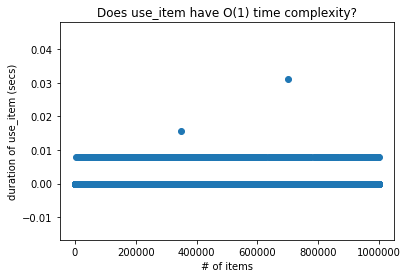

In [17]:
%matplotlib inline

from random import randint
from time import process_time

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')
from urank.UsageRanking import UsageRanking

n = 1000000
x = np.zeros(n)
y = np.zeros(n)
urank = UsageRanking()
for id in range(n):
    x[id] = id + 1
    start = process_time()
    urank.use_item(id)
    end = process_time()
    dur = end - start
    start = process_time()
    urank.use_item(randint(0, id))
    end = process_time()
    dur += end - start
    y[id] = dur / 2
plt.xlabel('# of items')
plt.ylabel('duration of use_item (secs)')
plt.title('Does use_item have O(1) time complexity?')
plt.scatter(x, y)


In the above plot, we can clearly see a couple of horizontal lines. The one slightly below 0.01 secs represents the theoretical O(1) that we predicted. The actual constant is likely smaller, but this test was run on Windows10; where clock can not reach nano-seconds precision. Further evidence of this is the horizontal line at zero, for all those cases the clock could not even measure any duration.

The two isolated dots above the lines, are likely maintenance moments of the underlaying Python dictionaries (though this last claim requires more research).